# Loading the data

In [ ]:
from datetime import datetime
import pandas as pd
inputData = pd.read_csv('editeddata.csv')
inputData

FileNotFoundError: ignored

# Plotting the data based on date

In [ ]:
# four possible date formats in input data: 
# %B %d, %Y  or %b %d, %Y or %d-%b-%y, %d-%m-%y, 
# want to convert to unified foramt: %m/%d/%y
formattedDate = []
Truedate=[]
Falsedate=[]
for i in range(len(inputData['date'])):
    dateStr = inputData['date'][i].strip()
    commaSplited = dateStr.split(',')
    if len(commaSplited) == 2:
        monthStr = commaSplited[0].split(' ')[0]
        if len(monthStr) == 3:
            date = datetime.strptime(dateStr, "%b %d, %Y")
        else:
            date = datetime.strptime(dateStr, "%B %d, %Y")
    else:
        dashSplited = dateStr.split('-')
        if len(dashSplited) == 3:
            if len(dashSplited[1]) == 3:
                date = datetime.strptime(dateStr, "%d-%b-%y")
            else:
                date = datetime.strptime(dateStr, "%d-%m-%y")
        else:
            continue
    formattedDate.append(date)
    if inputData['newstype'][i]==1:
      Truedate.append(date)
    else:
      Falsedate.append(date) 

formattedDate.sort()

## prepare xticks
xticks = []
tickMonth = 3
tickYear = 2015
nextTickMonth = -1
nextTickYear = -1
tickCount = 0
for date in formattedDate:
    year = datetime.strftime(date, "%Y")
    month = datetime.strftime(date, "%m")
    if int(month) == tickMonth and int(year) == tickYear:
        xticks.append(year+"-"+month if tickCount < 10 else "")
        nextTickMonth = 3 if tickMonth == 12 else tickMonth + 3
        nextTickYear = (tickYear + 1) if tickMonth == 12 else tickYear
        tickCount +=1
    else:
        if int(month) < nextTickMonth or int(year) < nextTickYear:
            xticks.append("")
            tickCount = 0
        else:
            xticks.append(year+"-"+month)
            tickMonth = nextTickMonth
            tickYear = nextTickYear
            tickCount = 1

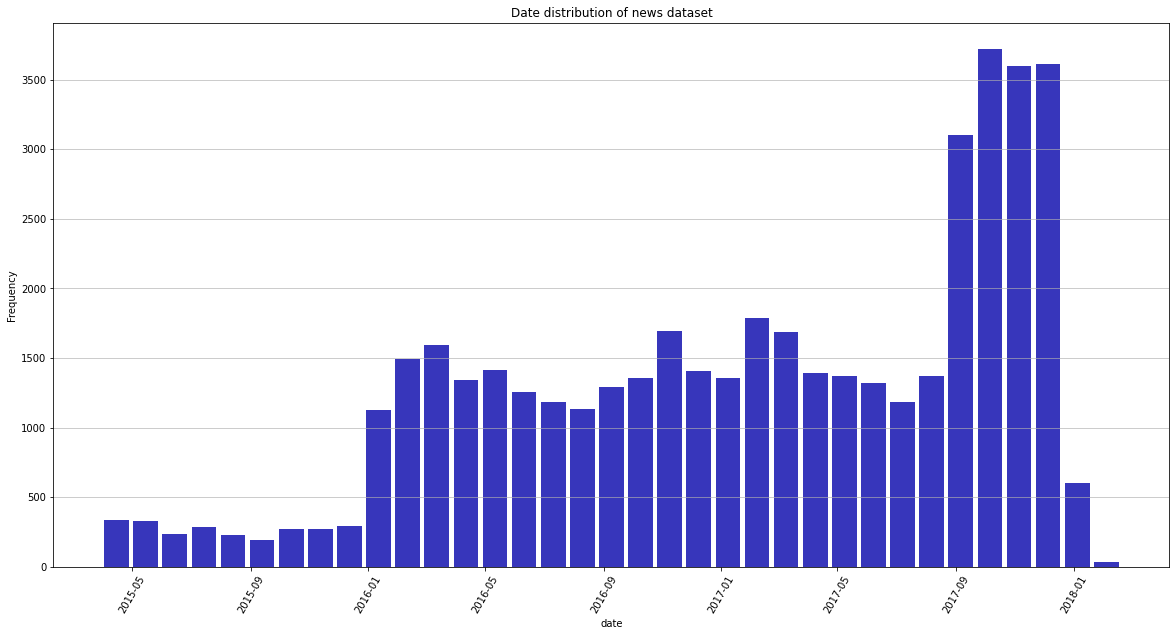

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime


plt.figure(figsize=(20, 10))
n, bins,patches = plt.hist(x=formattedDate, bins=35, color='#0504aa',alpha=0.8, rwidth=0.85)
plt.grid(axis='y', alpha=0.8)
plt.xlabel('date')
plt.ylabel('Frequency')
plt.title('Date distribution of news dataset')
plt.xticks(rotation=60)
plt.show()

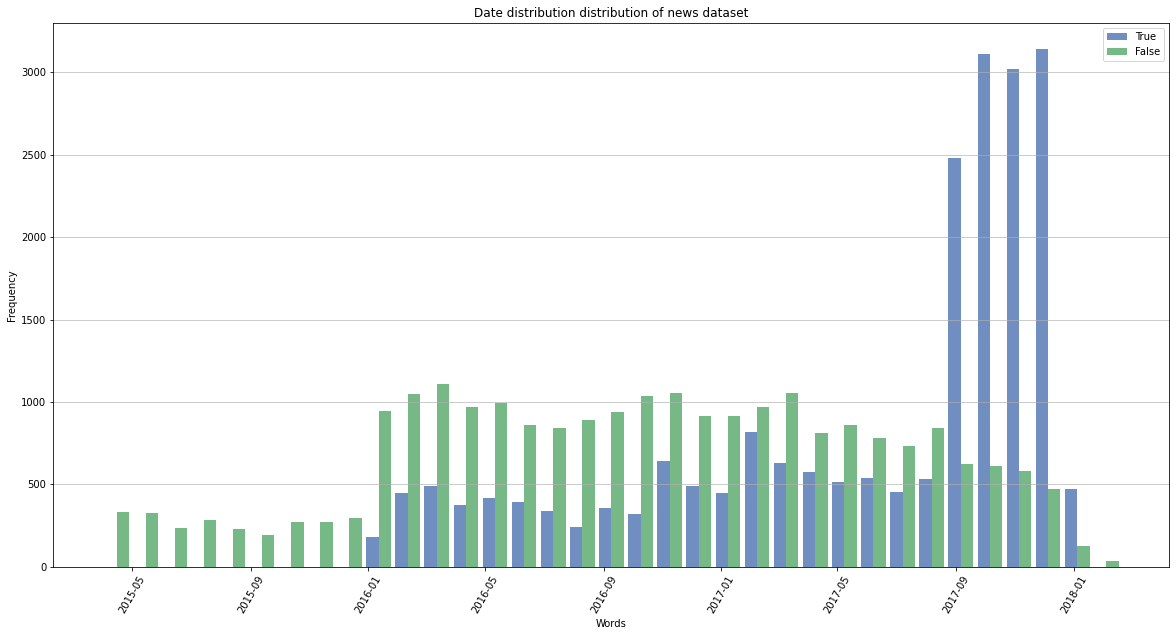

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use('seaborn-deep')
plt.figure(figsize=(20, 10))
plt.hist([Truedate,Falsedate], bins=35,alpha=0.8, rwidth=0.85)
plt.grid(axis='y', alpha=0.8)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Date distribution distribution of news dataset based on true/false')
plt.xticks(rotation=60)
plt.legend(['True','False'])
plt.show()

# Plotting the Data based on article Length

In [ ]:

def word_count(text):
  text = text.split(' ')
  return len(text);
inputData['word length']=inputData['text'].apply(word_count)

In [ ]:
inputData

,title,text,subject,date,newstype,lemm,stem,word length
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,"December 31, 2017",0,donald trump wish american happy new year leav...,donald trump wish american happi new year leav...,540
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",0,house intelligence committee chairman devin nu...,hous intellig committe chairman devin nune go ...,230
2,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff davi...,News,"December 30, 2017",0,friday revealed former milwaukee sheriff davi...,friday reveal former milwauke sheriff david c...,603
3,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would b...,News,"December 29, 2017",0,christmas day donald trump announced would b...,christma day donald trump announc would back...,491
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,"December 25, 2017",0,pope francis used annual christmas day message...,pope franci use annual christma day messag reb...,272
...,...,...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,brussels reuters nato allies tuesday welco...,worldnews,"August 22, 2017",1,brussels reuters nato ally tuesday welcome...,brussel reuter nato alli tuesday welcom pr...,389
44894,LexisNexis withdrew two products from Chinese ...,london reuters lexisnexis provider legal ...,worldnews,"August 22, 2017",1,london reuters lexisnexis provider legal ...,london reuter lexisnexi provid legal reg...,114
44895,Minsk cultural hub becomes haven from authorities,minsk reuters shadow disused soviet era fa...,worldnews,"August 22, 2017",1,minsk reuters shadow disused soviet era fa...,minsk reuter shadow disus soviet era facto...,257
44896,Vatican upbeat on possibility of Pope Francis ...,moscow reuters vatican secretary state car...,worldnews,"August 22, 2017",1,moscow reuters vatican secretary state car...,moscow reuter vatican secretari state card...,162


In [ ]:
wordcounts=[inputData['word length'].values,inputData['newstype'].values]


In [ ]:
newdataframe =inputData[['word length', 'newstype']] 

In [ ]:
newdata=newdataframe.values
newdata

array([[540,   0],
       [230,   0],
       [603,   0],
       ...,
       [257,   1],
       [162,   1],
       [202,   1]])

In [ ]:
edited = [x for x in wordcounts if x <= 3200]

In [ ]:
max(edited)

3135

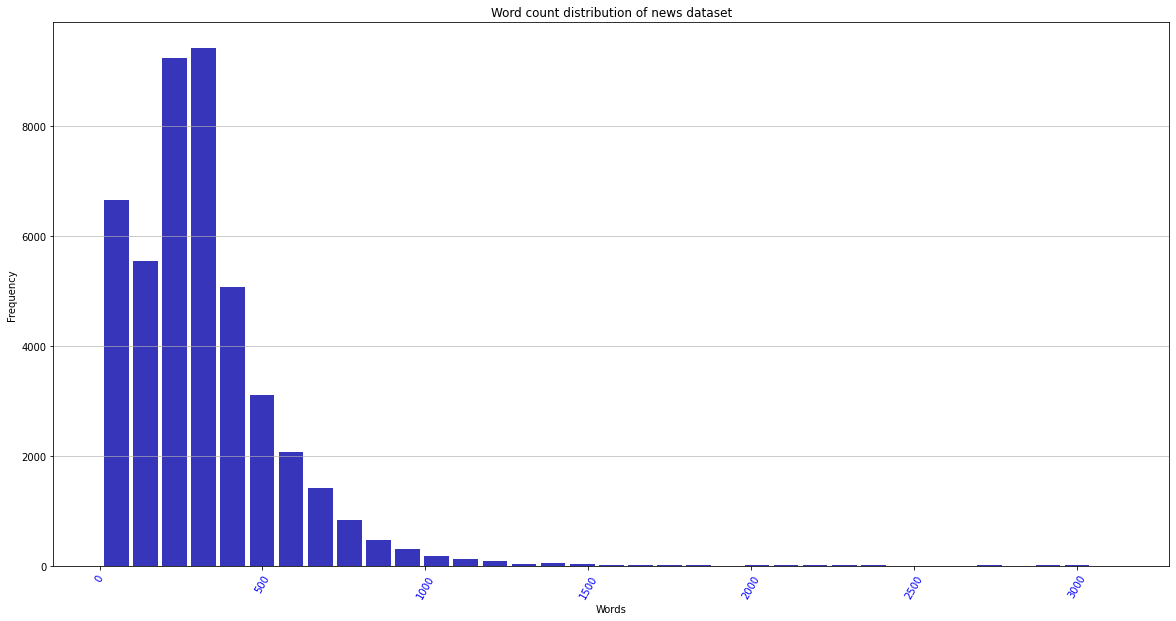

In [ ]:


import matplotlib.pyplot as plt
from datetime import datetime


plt.figure(figsize=(20, 10))
n, bins,patches = plt.hist(x=edited, bins=35, color='#0504aa',alpha=0.8, rwidth=0.85)
plt.grid(axis='y', alpha=0.8)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word count distribution of news dataset')
plt.xticks(color='blue',rotation=60)
plt.show()

In [ ]:
edited2 = [x for x in newdata if x[0] <= 3200]
true=[x[0] for x in edited2 if x[1] == 1]
false=[x[0] for x in edited2 if x[1] <= 0]

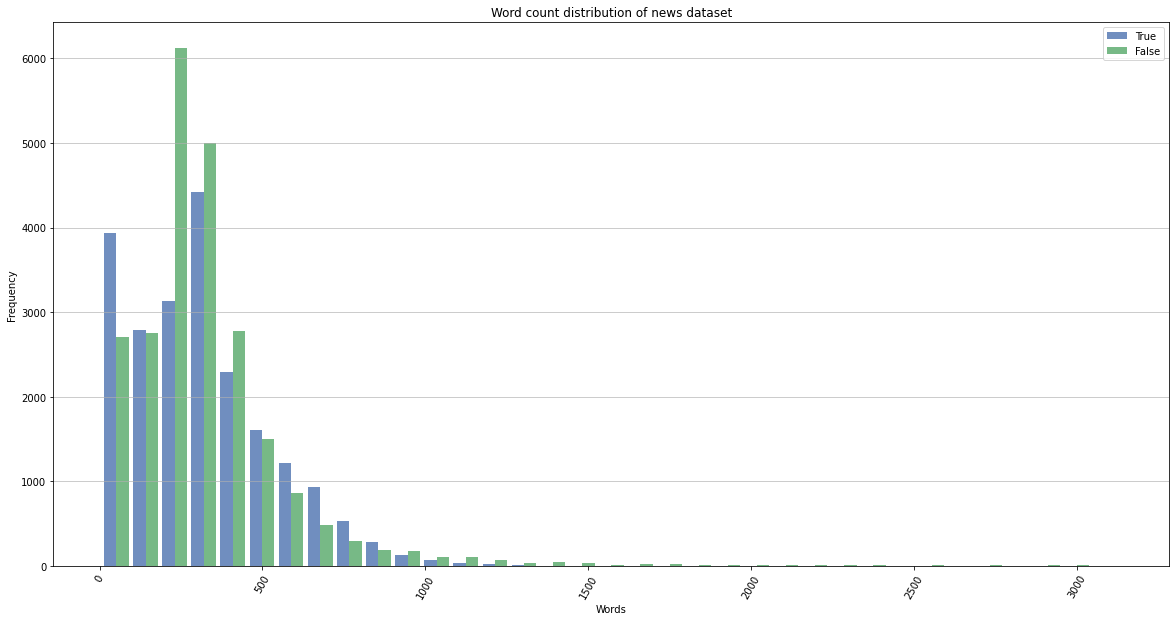

In [ ]:


import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use('seaborn-deep')
plt.figure(figsize=(20, 10))
plt.hist([true,false], bins=35,alpha=0.8, rwidth=0.85)
plt.grid(axis='y', alpha=0.8)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word count distribution of news dataset')
plt.xticks(rotation=60)
plt.legend(['True','False'])
plt.show()

# Plotting the data based on the subject

In [ ]:
inputData['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east', 'politicsNews', 'worldnews'], dtype=object)

In [ ]:
# 8 Possible Subjects 
formattedDate = []
#news count
News=0
politics=0
GovernmentNews=0
leftnews=0
US_News=0
Middleeast=0
politicsNews=0
worldnews=0
#Fake news count
NewsF=0
politicsF=0
GovernmentNewsF=0
leftnewsF=0
US_NewsF=0
MiddleeastF=0
politicsNewsF=0
worldnewsF=0
# true news count
NewsT=0
politicsT=0
GovernmentNewsT=0
leftnewsT=0
US_NewsT=0
MiddleeastT=0
politicsNewsT=0
worldnewsT=0
for i in range(len(inputData['date'])):
  if (inputData['subject'][i]=='News'):
    if inputData['newstype'][i]==1:
      NewsT+=1;
    else:
      NewsF+=1; 
    News+=1;
  elif (inputData['subject'][i]=='politics'):
    if inputData['newstype'][i]==1:
      politicsT+=1;
    else:
      politicsF+=1; 
    politics+=1;
  elif (inputData['subject'][i]=='Government News'):
    if inputData['newstype'][i]==1:
      GovernmentNewsT+=1;
    else:
      GovernmentNewsF+=1; 
    GovernmentNews+=1;
  elif (inputData['subject'][i]=='left-news'):
    if inputData['newstype'][i]==1:
      leftnewsT+=1;
    else:
      leftnewsF+=1;
    leftnews+=1;
  elif (inputData['subject'][i]=='US_News'):
    if inputData['newstype'][i]==1:
      US_NewsT+=1;
    else:
      US_NewsF+=1;
    US_News+=1;
  elif (inputData['subject'][i]=='Middle-east'):
    if inputData['newstype'][i]==1:
      MiddleeastT+=1;
    else:
      MiddleeastF+=1;
    Middleeast+=1;
  elif (inputData['subject'][i]=='politicsNews'):
    if inputData['newstype'][i]==1:
      politicsNewsT+=1;
    else:
      politicsNewsF+=1;
    politicsNews+=1;
  elif (inputData['subject'][i]=='worldnews'):
    if inputData['newstype'][i]==1:
      worldnewsT+=1;
    else:
      worldnewsF+=1;
    worldnews+=1;


In [ ]:
print(News)
print(politics)
print(GovernmentNews)
print(leftnews)
print(US_News)
print(Middleeast)
print(politicsNews)
print(worldnews)

9050
6841
1570
4459
783
778
11272
10145


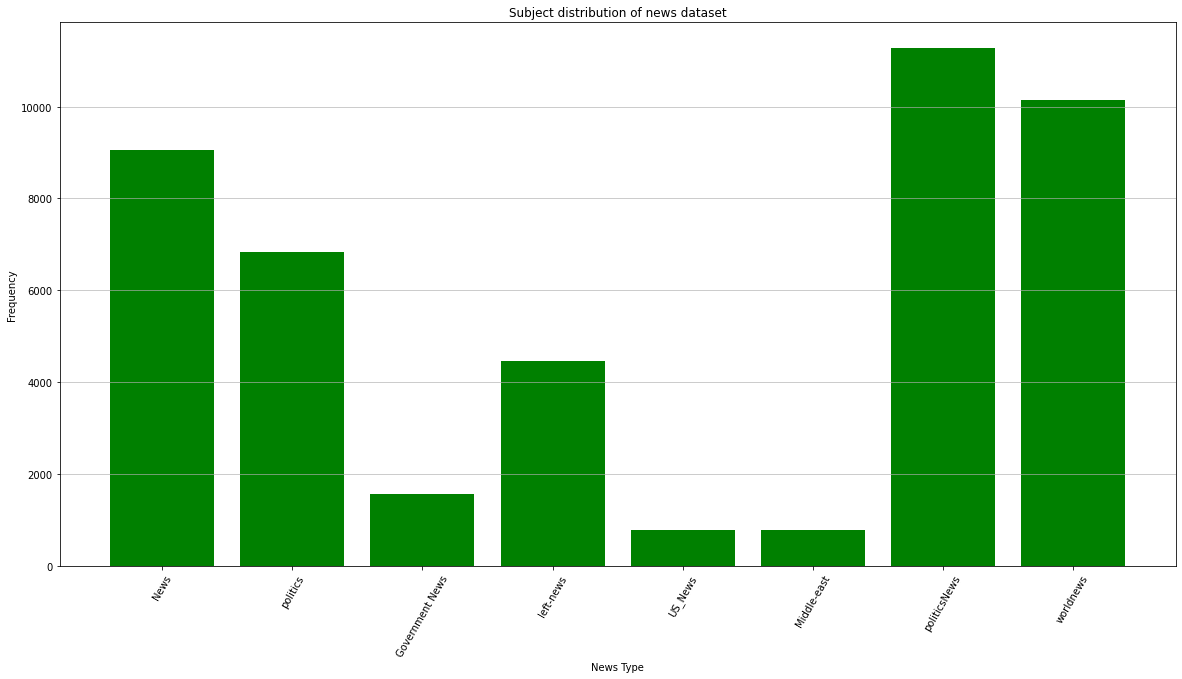

In [ ]:


import matplotlib.pyplot as plt
from datetime import datetime


plt.figure(figsize=(20, 10))
x = ['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east', 'politicsNews', 'worldnews']
energy = [News, politics, GovernmentNews, leftnews, US_News, Middleeast,politicsNews,worldnews]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x, energy, color='green')
plt.grid(axis='y', alpha=0.8)
plt.xlabel('News Type')
plt.ylabel('Frequency')
plt.title('Subject distribution of news dataset')
plt.xticks(rotation=60)
plt.show()

# Plotting the results

In [ ]:
# data that was obtained from the files that were previouusly saved
Models=['Random Forest','Ridge Classifier','Logistic Regression','Nearest Neighbor'];
AUCs=[0.9897545948989275866,0.9828478974903663845,0.9857900664330863094,0.9415280093452508]
F1Score=[0.9893278412282344725,0.9819912288886815110,0.9850690556177678081,0.9388703084355258]
recallScore=[0.9878481959244718169, 0.9837352776219854267,0.9867264909328846700,0.9446625537483642]
precessionScore=[0.9908119257453590345,0.9802533532041728392,0.9834171790572013849,0.9331486611265004]
trainscore=[1.000000000000000000,0.9994654470941110036, 0.9918926142606836471,0.93817004721884]
TestScore=[0.9898440979955456243,0.9828062360801781416,0.9857461024498886948,0.941380846325167]
roc=[0.9897545948989275866, 0.9828478974903663845, 0.9857900664330863094,0.9415280093452508]



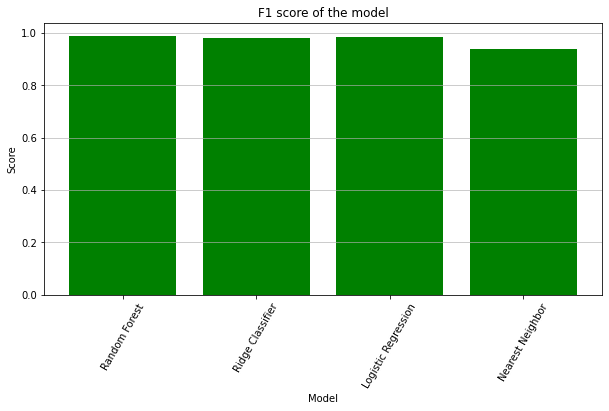

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(Models, F1Score, color='green')
plt.grid(axis='y', alpha=0.8)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('F1 score of the model')
plt.xticks(rotation=60)
plt.show()

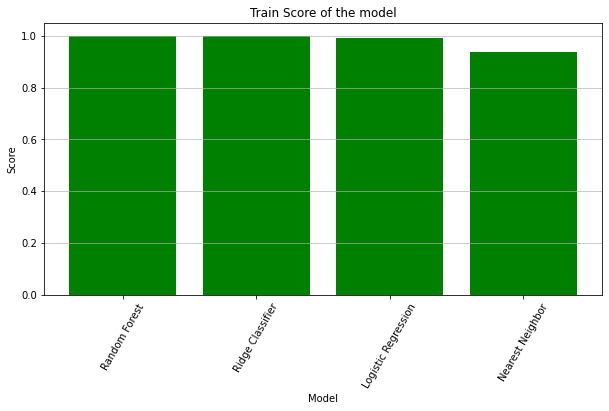

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(Models, trainscore, color='green')
plt.grid(axis='y', alpha=0.8)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Train Score of the model')
plt.xticks(rotation=60)
plt.show()

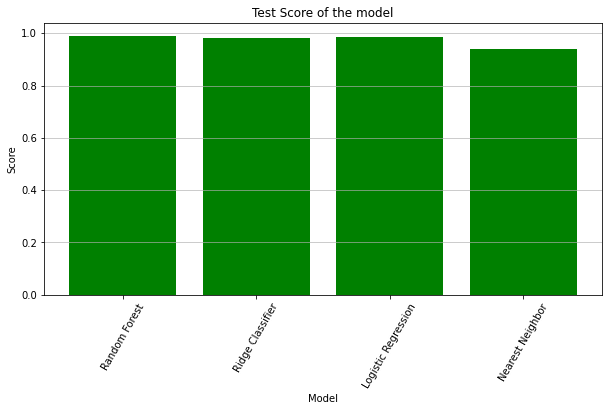

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(Models, TestScore, color='green')
plt.grid(axis='y', alpha=0.8)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Test Score of the model')
plt.xticks(rotation=60)
plt.show()

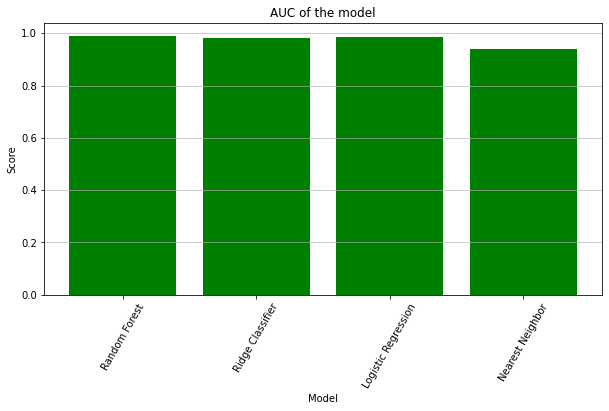

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(Models, AUCs, color='green')
plt.grid(axis='y', alpha=0.8)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('AUC of the model')
plt.xticks(rotation=60)
plt.show()